# Example usage of JSME and JsMol widgets

In [1]:
from qdk_chemistry.widgets import JsmeWidget, JsmolWidget

1. Design molecule

In [194]:
w = JsmeWidget()

In [195]:
w

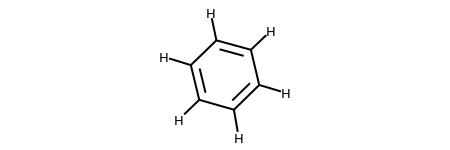

In [196]:
mol = w.to_mol(add_hs=True)
mol

2. Generate XYZ file from SMILES using rdkit

In [197]:
JsmolWidget.from_mol(mol)

JsmolWidget(layout=Layout(align_self='stretch', height='400px'))

## Larger example: Beta carotene

In [22]:
w2 = JsmeWidget(smiles="C/C(=C\\C=C\\C=C(C)\\C=C\\C=C(C)\\C=C\\C1=C(C)CCCC1(C)C)/C=C/C=C(C)/C=C/C2=C(C)CCCC2(C)C")

In [23]:
w2

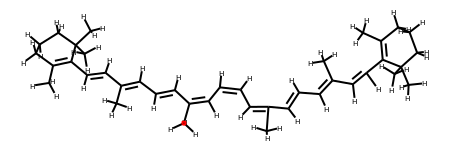

In [24]:
bc = w2.to_mol(add_hs=True)
bc

In [25]:
JsmolWidget.from_mol(bc)

Solution did not converge. Lowest energy found: 103.8324056063181


JsmolWidget(layout=Layout(align_self='stretch', height='400px'))

In [26]:
with open("data/bcarotene.xyz") as f:
    xyz = "".join(f.readlines())
JsmolWidget.from_str(xyz)

JsmolWidget(layout=Layout(align_self='stretch', height='400px'))

## Larger example: FeMoCo

In [27]:
w3 = JsmeWidget(smiles="[S@@]12[Fe]345(SC)[Fe]6781[C@]19[Fe]%10%11%12%13S[Fe]%143%10([S@@]46)[Fe]321(S[Fe]12%113[S@@]%12[Mo]34(OC(=O)CO4)([S@@]%13[Fe]791(S8)[S@@]23)N1CNC=C1)[S@@]5%14")
# Replace Carbon atom with Chromium to circumvent RDKit valence issue

In [28]:
w3

RDKit ERROR: [10:20:42] UFFTYPER: Unrecognized charge state for atom: 0
RDKit ERROR: [10:20:42] UFFTYPER: Unrecognized hybridization for atom: 1
RDKit ERROR: [10:20:42] UFFTYPER: Unrecognized atom type: Fe (1)
RDKit ERROR: [10:20:42] UFFTYPER: Unrecognized hybridization for atom: 4
RDKit ERROR: [10:20:42] UFFTYPER: Unrecognized atom type: Fe (4)
RDKit ERROR: [10:20:42] UFFTYPER: Unrecognized hybridization for atom: 6
RDKit ERROR: [10:20:42] UFFTYPER: Unrecognized atom type: Fe (6)
RDKit ERROR: [10:20:42] UFFTYPER: Unrecognized hybridization for atom: 8
RDKit ERROR: [10:20:42] UFFTYPER: Unrecognized atom type: Fe (8)
RDKit ERROR: [10:20:42] UFFTYPER: Unrecognized charge state for atom: 9
RDKit ERROR: [10:20:42] UFFTYPER: Unrecognized hybridization for atom: 10
RDKit ERROR: [10:20:42] UFFTYPER: Unrecognized atom type: Fe (10)
RDKit ERROR: [10:20:42] UFFTYPER: Unrecognized hybridization for atom: 12
RDKit ERROR: [10:20:42] UFFTYPER: Unrecognized atom type: Fe (12)
RDKit ERROR: [10:20:42] 

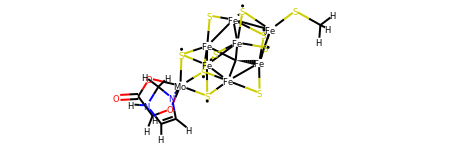

In [29]:
femoco = w3.to_mol(add_hs=True)
femoco

In [30]:
JsmolWidget.from_mol(femoco)

Solution did not converge. Lowest energy found: -1.0


JsmolWidget(layout=Layout(align_self='stretch', height='400px'))

In [31]:
with open("data/femoco.xyz") as f:
    xyz = "".join(f.readlines())
JsmolWidget.from_str(xyz)

JsmolWidget(layout=Layout(align_self='stretch', height='400px'))

## H2O demo

In [1]:
from qdk_chemistry.widgets import JsmeWidget, JsmolWidget

In [2]:
mol_name = "HHO"
w = JsmeWidget(smiles=f"[{mol_name}]")

In [3]:
w

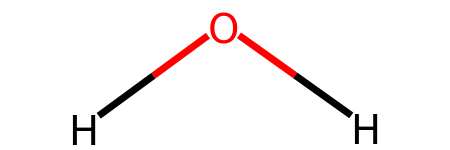

In [4]:
mol = w.to_mol(add_hs=True)
mol

In [5]:
JsmolWidget.from_mol(mol)

JsmolWidget(layout=Layout(align_self='stretch', height='400px'))

In [6]:
from qdk_chemistry.convert import mol_to_xyz, num_electrons

In [7]:
xyz = mol_to_xyz(mol)
print(xyz)

3
title
O 0.008745998706025862 0.3977188702645636 0.0 
H 0.758910362423615 -0.21564433665585545 0.0 
H -0.7676563611296411 -0.18207453360870887 0.0 


In [8]:
from qdk_chemistry.solvers.nwchem import geometry_from_xyz

In [9]:
geometry = geometry_from_xyz(xyz)
print(geometry)

O 0.008745998706025862 0.3977188702645636 0.0 
H 0.758910362423615 -0.21564433665585545 0.0 
H -0.7676563611296411 -0.18207453360870887 0.0 


### Create nw file

In [10]:
from qdk_chemistry.solvers.nwchem import create_input_deck

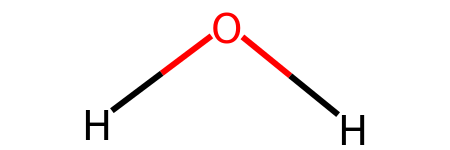

In [11]:
mol

In [12]:
mol_name

'HHO'

In [14]:
nw_chem_input = create_input_deck(mol_name=mol_name, geometry=geometry, num_orbitals=7, mol=mol)
print(nw_chem_input)


start HHO_test

echo
memory stack 1000 mb heap 100 mb global 1000 mb noverify

geometry units au
symmetry c1
O 0.008745998706025862 0.3977188702645636 0.0 
H 0.758910362423615 -0.21564433665585545 0.0 
H -0.7676563611296411 -0.18207453360870887 0.0 
end

basis
* library sto-3g
end

charge 0

scf
thresh 1.0e-10
tol2e 1.0e-10
rhf
singlet
end

tce
ccsd
tilesize 1
2eorb
2emet 13
nroots 5
thresh 1.0e-6
end

set tce:print_integrals T
set tce:qorb 7
set tce:qela 5
set tce:qelb 5

task tce energy



In [15]:
with open(f"data/{mol_name}.nw", "w") as f:
    f.write(nw_chem_input)

### Get Broombridge

Run with Docker:
```bash
docker run -v C:\Users\guenp\Documents:"/opt/data" --entrypoint='yaml_driver' nwchemorg/nwchem-qc /opt/data/test.nw
```

Or use Chemistry service PoC:

In [16]:
import sys
sys.path.append("/home/guen/repos/qdk-private/src/Python")

In [17]:
import logging
logging.basicConfig(level=logging.WARNING)
logger = logging.getLogger('azure.quantum')
logger.setLevel(logging.INFO)


import uuid
import sys
import io
import os
os.environ['AZURE_QUANTUM_ENV'] = 'canary'
os.environ['AZURE_QUANTUM_STORAGE'] = ''

from azure.quantum import Workspace, Job
from azure.quantum.chemistry import ChemProblem, Chemistry
import shutil

INFO:azure.quantum:version: 0.0.0.1
INFO:azure.quantum.workspace:Using CANARY configuration.


In [18]:
ws = Workspace(
     subscription_id="916dfd6d-030c-4bd9-b579-7bb6d1926e97",
     resource_group="chemistry-test", 
     name="chemistrydemo2"
)

In [20]:
input_dir = 'data'
input_files = [f'{mol_name}.nw']
param_files = []
output_dir = 'data/output'

chem_problem = ChemProblem('nwchem-problem', input_dir, input_files, param_files)
chem_solver = Chemistry(ws, chem_problem.gen_parameters('nwchem'))
solution = chem_solver.optimize(chem_problem, output_dir=output_dir)
print(f"The result file is : {solution}")

INFO:azure.quantum.optimization.solvers:Submitting job with id: 04bae200-18b8-11eb-b2a8-2f0bb679ad13
INFO:azure.quantum.workspace:Account(s) exists in aad token cache. Getting token for (userName: guenp@microsoft.com, tenantId: 72f988bf-86f1-41af-91ab-2d7cd011db47)
INFO:azure.quantum.storage:Uploading blob 'inputData' to container 'job-04bae200-18b8-11eb-b2a8-2f0bb679ad13' on account: 'chemistrytests'
INFO:azure.quantum.optimization.solvers:Submitting problem 'nwchem-problem'. Using payload from: 'https://chemistrytests.blob.core.windows.net/job-04bae200-18b8-11eb-b2a8-2f0bb679ad13/inputData'
INFO:azure.quantum.chemistry.solvers:Submitted job: '04bae200-18b8-11eb-b2a8-2f0bb679ad13'


............

INFO:azure.quantum.storage:Downloading blob 'rawOutputData' from container 'job-04bae200-18b8-11eb-b2a8-2f0bb679ad13' on account: 'chemistrytests'



The result file is : data/output/job-04bae200-18b8-11eb-b2a8-2f0bb679ad13.tar.gz


In [21]:
import os
import tarfile
output_dir ="data"

bb_members = [member for member in tarfile.open(solution).getmembers() if member.name.endswith("yaml")]
tarfile.open(solution).extractall(path=output_dir, members=bb_members)
bb_path = os.path.join(output_dir, os.path.split(bb_members[0].name)[1])
print(bb_path)

data/HHO.yaml


# Estimate resources with Q#

In [1]:
import qsharp

In [2]:
qsharp.packages.add("Microsoft.Quantum.Chemistry")

Adding package Microsoft.Quantum.Chemistry.

In [3]:
GetEnergyByTrotterization = qsharp.compile("""
open Microsoft.Quantum.Core;
open Microsoft.Quantum.Intrinsic;
open Microsoft.Quantum.Canon;
open Microsoft.Quantum.Chemistry;
open Microsoft.Quantum.Chemistry.JordanWigner;  
open Microsoft.Quantum.Simulation;
open Microsoft.Quantum.Characterization;
open Microsoft.Quantum.Convert;
open Microsoft.Quantum.Math;

operation GetEnergyByTrotterization (
    JWEncodedData: JordanWignerEncodingData,
    nBitsPrecision : Int, 
    trotterStepSize : Double, 
    trotterOrder : Int
) : (Double, Double) {

    let (nSpinOrbitals, fermionTermData, inputState, energyOffset) = JWEncodedData!;
    let (nQubits, (rescaleFactor, oracle)) = TrotterStepOracle(JWEncodedData, trotterStepSize, trotterOrder);
    let statePrep = PrepareTrialState(inputState, _);
    let phaseEstAlgorithm = RobustPhaseEstimation(nBitsPrecision, _, _);
    let estPhase = EstimateEnergy(nQubits, statePrep, oracle, phaseEstAlgorithm);
    let estEnergy = estPhase * rescaleFactor + energyOffset;
    return (estPhase, estEnergy);
}
""")

In [4]:
from qsharp.chemistry import load_broombridge, load_fermion_hamiltonian, load_input_state, encode

Adding package microsoft.quantum.chemistry.jupyter.

In [9]:
filename = "data/HHO.yaml"
broombridge_data =  load_broombridge(filename)
problem_description = broombridge_data.problem_description[0]
ferm_hamiltonian = problem_description.load_fermion_hamiltonian()
input_state = load_input_state(filename, "|G>")
num_qubits, hamiltonian_term_list, input_state_terms, energy_offset = encode(ferm_hamiltonian, input_state)

In [10]:
num_qubits

14

In [11]:
%%time
GetEnergyByTrotterization.estimate_resources(
    JWEncodedData=(num_qubits, hamiltonian_term_list, input_state_terms, energy_offset), 
    nBitsPrecision=7,
    trotterStepSize=0.4, 
    trotterOrder=1)

CPU times: user 420 µs, sys: 60.7 ms, total: 61.1 ms
Wall time: 1min 44s


{'CNOT': 40306624,
 'QubitClifford': 16556162,
 'R': 5604868,
 'Measure': 327,
 'T': 0,
 'Depth': 0,
 'Width': 15,
 'BorrowedWidth': 0}

In [191]:
%%time
GetEnergyByTrotterization.simulate(
    JWEncodedData=(num_qubits, hamiltonian_term_list, input_state_terms, energy_offset), 
    nBitsPrecision=7,
    trotterStepSize=0.4,
    trotterOrder=1)

CPU times: user 15.5 ms, sys: 94.2 ms, total: 110 ms
Wall time: 3min 37s


(-0.02454369260617026, -41.86331188241254)